In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [39]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-prediction/Cellphone.csv
/kaggle/input/mobile-price-prediction/Cellphone.xlsx


In [50]:
df = pd.read_csv('/kaggle/input/mobile-price-prediction/Cellphone.csv')
print('Size of a dataset:',df.shape)

df.head()

Size of a dataset: (161, 14)


Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

In [6]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [7]:
def missing_data(df):
    missing_rate = df.isnull().mean() * 100
    missing_data = missing_rate[missing_rate > 0]
    
    missing_data_df = pd.DataFrame({
        'Variable': missing_data.index,
        'Missing Rate (%)': missing_data.values
    }).sort_values(by='Missing Rate (%)', ascending=False)
    
    return missing_data_df.reset_index(drop=True)

print(missing_data(df))

Empty DataFrame
Columns: [Variable, Missing Rate (%)]
Index: []


## Outliers Check

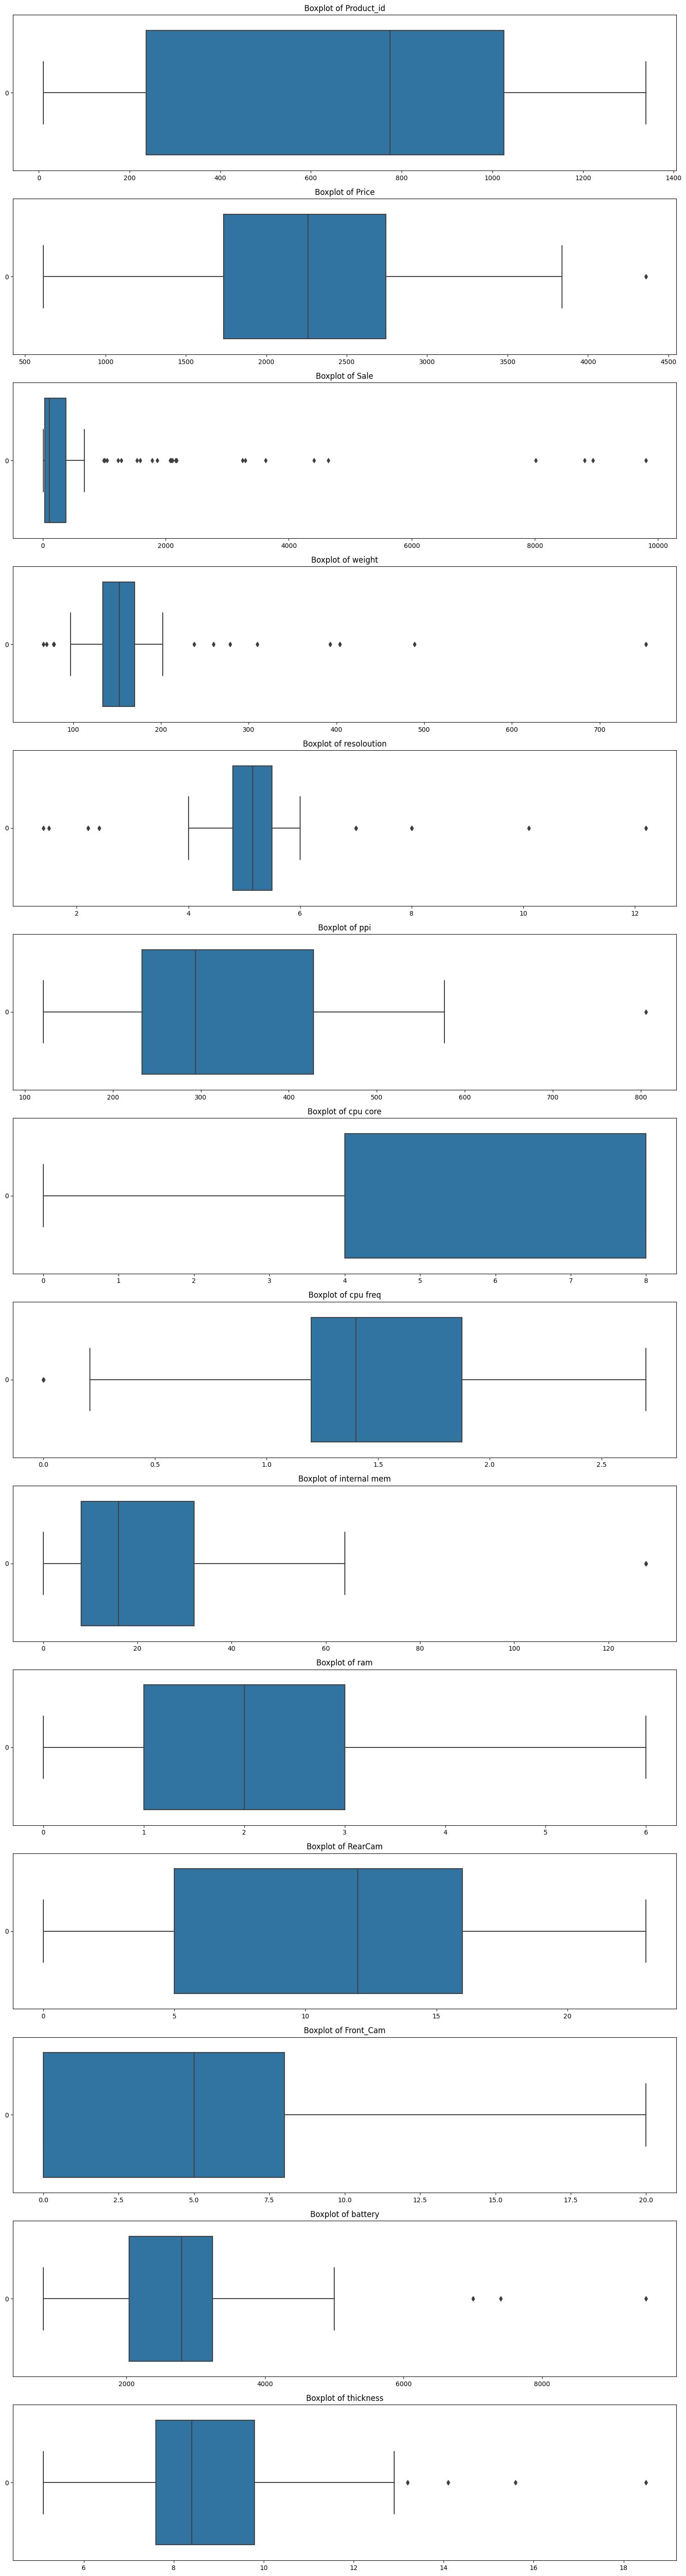

In [10]:
def plot_all_boxplots(df):
    numeric_columns = df.select_dtypes(include='number').columns

    plt.figure(figsize=(15, len(numeric_columns) * 4))
    
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)
        sns.boxplot(data=df[col], orient='h')
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

plot_all_boxplots(df)

In [16]:
def iqr_outliers_columns(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df < lower_bound) | (df > upper_bound)
    outlier_columns = outliers.any(axis=0)
    
    outlier_counts = outliers.sum(axis=0)
    outlier_counts = outlier_counts[outlier_counts > 0]
    outlier_counts_sorted = outlier_counts.sort_values(ascending=False)
    return outlier_counts_sorted

outlier_counts = iqr_outliers_columns(df)
print("Outlier counts from highest to lowest:")
print(outlier_counts)

Outlier counts from highest to lowest:
resoloution     26
Sale            24
weight          24
cpu freq        10
internal mem     8
thickness        8
battery          6
Price            2
ppi              2
dtype: int64


In [51]:
def replace_outliers_iqr(df, column_list):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    for col in column_list:
        if col in df.columns:
            median = df[col].median()
            df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), median, df[col])

    return df

df = replace_outliers_iqr(df,['resoloution','Sale', 'weight'])

In [52]:
df.head()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357  10.0   135.0          5.2  424         8      1.35   
1         880   1749  10.0   125.0          4.0  233         2      1.30   
2          40   1916  10.0   110.0          4.7  312         4      1.20   
3          99   1315  11.0   118.5          4.0  233         2      1.30   
4         880   1749  11.0   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

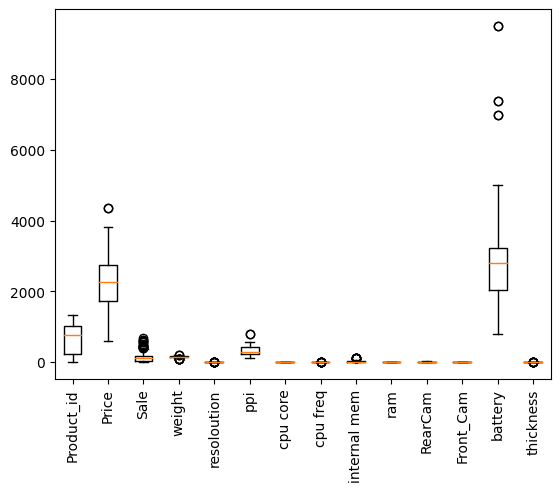

In [53]:
plt.boxplot(df,labels=df.columns)
plt.xticks(rotation=90)
plt.show()

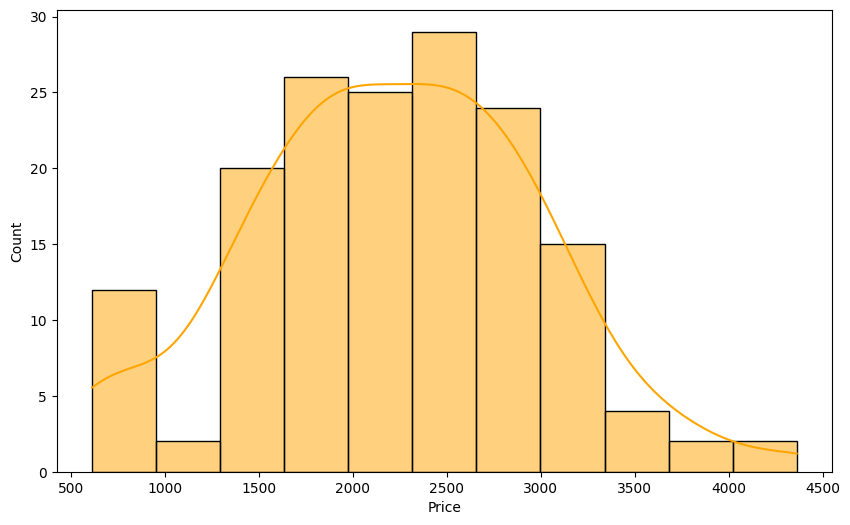

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],kde=True,color='orange')
plt.show()

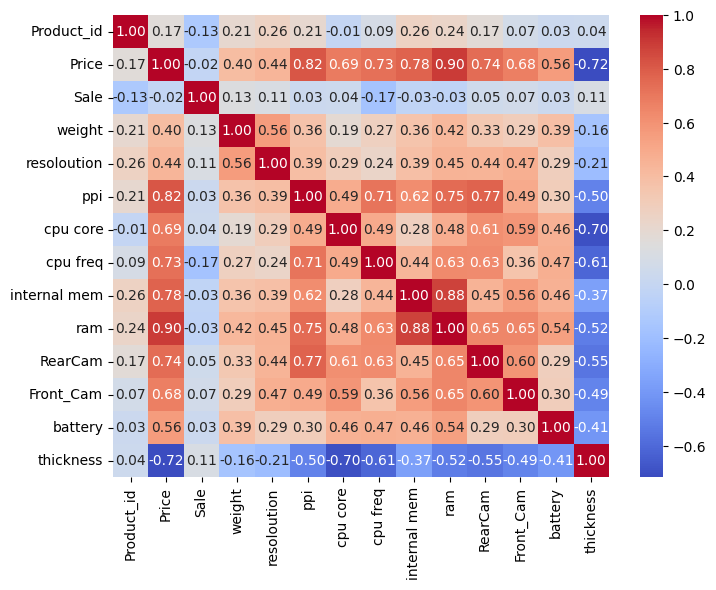

In [35]:
## Varible correlation
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [46]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [47]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler() 
# cols_to_n = ['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
#              'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness', 'Sale']
# df[cols_to_n] = sc.fit_transform(df[cols_to_n])

# #Created an object for StandardScaler
# stand = StandardScaler()
# x_train = stand.fit_transform(x_train)
# x_test = stand.transform(x_test)

In [48]:
df.head()

Product_id  Price      Sale    weight  resoloution       ppi  cpu core  \
0         203   2357  0.000000  0.361905         0.60  0.442336      1.00   
1         880   1749  0.000000  0.266667         0.00  0.163504      0.25   
2          40   1916  0.000000  0.123810         0.35  0.278832      0.50   
3          99   1315  0.001497  0.204762         0.00  0.163504      0.25   
4         880   1749  0.001497  0.266667         0.00  0.163504      0.25   

   cpu freq  internal mem       ram   RearCam  Front_Cam   battery  thickness  
0  0.500000       0.12500  0.500000  0.565217       0.40  0.208046   0.171642  
1  0.481481       0.03125  0.166667  0.136957       0.00  0.103448   0.358209  
2  0.444444       0.06250  0.250000  0.565217       0.25  0.137931   0.186567  
3  0.481481       0.03125  0.085333  0.136957       0.00  0.068966   0.440299  
4  0.481481       0.03125  0.166667  0.136957       0.00  0.103448   0.358209

## Build Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X = df.drop(columns=['Product_id', 'Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling (use StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

#Evaluation Metric
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

print("Predicted prices:", y_pred)

Mean Squared Error: 17652.179763636363
R-squared: 0.9688613135551408
Predicted prices: [ 887.42 1773.15 2626.45 1736.4  1615.56 1870.23  881.87 1423.96 2352.08
 2626.45 1354.74 1557.48 1750.21 2868.12 2048.29 2124.09 2351.52 3185.71
 1545.13 2129.35 2298.96 1746.62 1926.17 2518.28 2961.49 3905.21 2566.01
 3446.16 2565.17 2635.77 3067.88 2605.43 2760.9 ]
